In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('^GSPC.csv', index_col = "Date", parse_dates = True)

In [10]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-03-09,680.760010,695.270020,672.880005,676.530029,676.530029,7277320000
2009-03-10,679.280029,719.599976,679.280029,719.599976,719.599976,8618330000
2009-03-11,719.590027,731.919983,713.849976,721.359985,721.359985,7287810000
2009-03-12,720.890015,752.630005,714.760010,750.739990,750.739990,7326630000
2009-03-13,751.969971,758.289978,742.460022,756.549988,756.549988,6787090000
...,...,...,...,...,...,...
2020-05-27,3015.649902,3036.250000,2969.750000,3036.129883,3036.129883,6371230000
2020-05-28,3046.610107,3068.669922,3023.399902,3029.729980,3029.729980,5402670000
2020-05-29,3025.169922,3049.169922,2998.610107,3044.310059,3044.310059,7275080000


In [6]:
scaler = MinMaxScaler(feature_range = (0,1))

In [9]:
training_data = scaler.fit_transform(data)

In [15]:
X_train = []
Y_train = []
for i in range (120, 2829): 
    X_train.append(training_data[i-120:i, 0])
    Y_train.append(training_data[i, 0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [16]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [37]:
regressor = tf.keras.Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [39]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, Y_train, epochs = 100, batch_size = 32)

Epoch 1/100
85/85 [==============================] - 13s 151ms/step - loss: 0.0271
Epoch 2/100
85/85 [==============================] - 13s 149ms/step - loss: 0.0103
Epoch 3/100
85/85 [==============================] - 14s 160ms/step - loss: 0.0080
Epoch 4/100
85/85 [==============================] - 14s 167ms/step - loss: 0.0068
Epoch 5/100
85/85 [==============================] - 15s 172ms/step - loss: 0.0060
Epoch 6/100
85/85 [==============================] - 15s 176ms/step - loss: 0.0055
Epoch 7/100
85/85 [==============================] - 16s 191ms/step - loss: 0.0051
Epoch 8/100
85/85 [==============================] - 17s 195ms/step - loss: 0.0049
Epoch 9/100
85/85 [==============================] - 15s 182ms/step - loss: 0.0044
Epoch 10/100
85/85 [==============================] - 17s 199ms/step - loss: 0.0042
Epoch 11/100
85/85 [==============================] - 16s 192ms/step - loss: 0.0039
Epoch 12/100
85/85 [==============================] - 25s 293ms/step - loss: 0.0038
E

85/85 [==============================] - 17s 205ms/step - loss: 0.0019
Epoch 99/100
85/85 [==============================] - 18s 210ms/step - loss: 0.0020
Epoch 100/100
85/85 [==============================] - 17s 204ms/step - loss: 0.0019


In [41]:
 test_data = pd.read_csv('^GSPC_YTD.csv', index_col= "Date", parse_dates = True)

In [44]:
test_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,3244.669922,3258.139893,3235.530029,3257.850098,3257.850098,3458250000
2020-01-03,3226.360107,3246.149902,3222.340088,3234.850098,3234.850098,3461290000
2020-01-06,3217.550049,3246.840088,3214.639893,3246.280029,3246.280029,3674070000
2020-01-07,3241.860107,3244.909912,3232.429932,3237.179932,3237.179932,3420380000
2020-01-08,3238.590088,3267.070068,3236.669922,3253.050049,3253.050049,3720890000
...,...,...,...,...,...,...
2020-07-13,3205.080078,3235.320068,3149.429932,3155.219971,3155.219971,4890780000
2020-07-14,3141.110107,3200.949951,3127.659912,3197.520020,3197.520020,4476170000
2020-07-15,3225.979980,3238.280029,3200.760010,3226.560059,3226.560059,4669760000


In [42]:
actual = test_data.iloc[:, 1:2].values

In [43]:
actual

array([[3258.139893],
       [3246.149902],
       [3246.840088],
       [3244.909912],
       [3267.070068],
       [3275.580078],
       [3282.98999 ],
       [3288.129883],
       [3294.25    ],
       [3298.659912],
       [3317.110107],
       [3329.879883],
       [3329.790039],
       [3337.77002 ],
       [3326.879883],
       [3333.179932],
       [3258.850098],
       [3285.780029],
       [3293.469971],
       [3285.909912],
       [3282.330078],
       [3268.439941],
       [3306.919922],
       [3337.580078],
       [3347.959961],
       [3341.419922],
       [3352.26001 ],
       [3375.629883],
       [3381.469971],
       [3385.090088],
       [3380.689941],
       [3375.01001 ],
       [3393.52002 ],
       [3389.149902],
       [3360.76001 ],
       [3259.810059],
       [3246.98999 ],
       [3182.51001 ],
       [3097.070068],
       [2959.719971],
       [3090.959961],
       [3136.719971],
       [3130.969971],
       [3083.040039],
       [2985.929932],
       [28

In [66]:
data_all = pd.concat((data['Open'], test_data['Open']), axis = 0)

In [71]:
data_all

Date
2009-03-09     680.760010
2009-03-10     679.280029
2009-03-11     719.590027
2009-03-12     720.890015
2009-03-13     751.969971
                 ...     
2020-07-13    3205.080078
2020-07-14    3141.110107
2020-07-15    3225.979980
2020-07-16    3208.360107
2020-07-17    3224.209961
Name: Open, Length: 2966, dtype: float64

In [89]:
end = data_all[len(data_all) - len(test_data) - 120:].values

In [91]:
end = end.reshape(-1, 1)

In [92]:
end = scaler.fit_transform(end)

In [95]:
X_test = []
for i in range(120, 257):
    X_test.append(end[i-120:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted = regressor.predict(X_test)
predicted = scaler.inverse_transform((predicted) [:,  0])

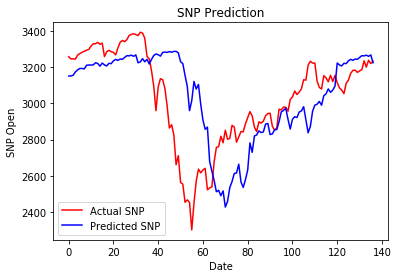

In [100]:
plt.plot(actual, color = 'red', label = 'Actual SNP')
plt.plot(predicted, color = 'blue', label = 'Predicted SNP')
plt.title('SNP Prediction')
plt.xlabel('Date')
plt.ylabel('SNP Open')
plt.legend()
plt.show()